# Time value of the money
In this chapter, various concepts and formulae associated with finance will be
introduced and discussed in detail. Since those concepts and formulae are so basic,
readers who have taken one finance course, or professionals with a few years' working
experience in the financial industry, could go through this chapter quickly
In particular, the following topics will be covered:
- Present value of one future cash flow and the present value of perpetuity
- Present value of growing perpetuity
- Present and future value of annuity
- Perpetuity versus perpetuity due, annuity versus annuity due
- Relevant functions contained in SciPy and the numpy.lib.financial submodule
- Definition of NPV and NPV rule
- Definition of IRR and IRR rule
- Python graphical presentation of time value of money, and NPV profile
- Definition of payback period and payback period rule
- How to write your own financial calculator using Python

## introduction 
Let's use a very simple example to illustrate. Assume that $100 is deposited in a bank
today with an annual interest rate of 10%. What is the value of the deposit one year
later? Here is the timeline with the dates and cash flows:
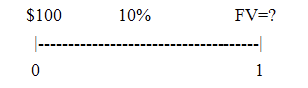

Obviously, our annual interest payment will be $10, that is, 100*0.1=10. Thus, the
total value will be 110, that is, 100 + 10. The original $100 is principal. Alternatively,
we have the following result:


If $100 is deposited for five years with an annual interest rate of 10%, what is the
future value at the end of year five? Based on the preceding logic, we could have the
following formula:

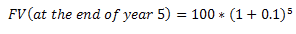

Generalization leads to our first formula to estimate the future value for one given
present value:
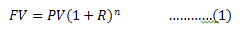

Here, FV is the future value, PV is the present value, R is the period rate and n is
the number of periods. In the preceding example, R is the annual interest rate and n
is the number of years. The frequencies of R and n should be the same. This means
that if R is the annual (monthly/quarterly/daily) rate then n must be number of
years (months/quarters/days). The corresponding function, called fv() in the
SciPy module, could be used to estimate the future value; see the following code. To
estimate the future value at the end of year two with a 10% annual interest rate for 100, we
have the following code:

In [5]:
import scipy as sp
sp.fv(0.1,2,0,100)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.fv is deprecated and will be removed in SciPy 2.0.0, use numpy.fv instead
  


-121.00000000000001

At the moment, just ignore the last variable called when. For Equation (1), there is
no pmt, thus the third input should be zero. Please pay attention to the negative
sign of the previous result. The reason is that scipy.fv() function follows the Excel
sign convention: a positive future value leads to a negative present value

In [6]:
help(sp.fv)

Help on function fv in module numpy:

fv(rate, nper, pmt, pv, when='end')
    scipy.fv is deprecated and will be removed in SciPy 2.0.0, use numpy.fv instead



In [7]:
help(sp.pv)

Help on function pv in module numpy:

pv(rate, nper, pmt, fv=0, when='end')
    scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead



If we
plan to have $234 at the end of year five and the interest rate is 1.45% per year, how
much we have to deposit today?

In [8]:
234/(1+0.0145)**5

217.74871488824184

In [9]:
sp.pv(0.0145,5,0,234)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.pv is deprecated and will be removed in SciPy 2.0.0, use numpy.pv instead
  """Entry point for launching an IPython kernel.


-217.74871488824184

In [10]:
import numpy as np
help(np.pv)

Help on function pv in module numpy:

pv(rate, nper, pmt, fv=0, when='end')
    Compute the present value.
    
    Given:
     * a future value, `fv`
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * a (fixed) payment, `pmt`, paid either
     * at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the value now
    
    Parameters
    ----------
    rate : array_like
        Rate of interest (per period)
    nper : array_like
        Number of compounding periods
    pmt : array_like
        Payment
    fv : array_like, optional
        Future value
    when : {{'begin', 1}, {'end', 0}}, {string, int}, optional
        When payments are due ('begin' (1) or 'end' (0))
    
    Returns
    -------
    out : ndarray, float
        Present value of a series of payments or investments.
    
    Notes
    -----
    The present value is computed by solving the equation::

In [11]:
help(np.fv)

Help on function fv in module numpy:

fv(rate, nper, pmt, pv, when='end')
    Compute the future value.
    
    Given:
     * a present value, `pv`
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * a (fixed) payment, `pmt`, paid either
     * at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the value at the end of the `nper` periods
    
    Parameters
    ----------
    rate : scalar or array_like of shape(M, )
        Rate of interest as decimal (not per cent) per period
    nper : scalar or array_like of shape(M, )
        Number of compounding periods
    pmt : scalar or array_like of shape(M, )
        Payment
    pv : scalar or array_like of shape(M, )
        Present value
    when : {{'begin', 1}, {'end', 0}}, {string, int}, optional
        When payments are due ('begin' (1) or 'end' (0)).
        Defaults to {'end', 0}.
    
    Returns
    -------


In [13]:
np.pv(0.05/12, 10*12, -100,0)

9428.135032823473

Note that for the fourth input variable of a set of inputs, the scipy.fv() and scipy.
pv() functions behave differently: spicy.fv(0.1,1,100) would give us an error
message while scipy.pv(0.1,1,100) would work perfectly. The reason is that the
default value of the fourth input variable in scipy.pv() function is zero while there
is no default value for the fourth input variable in the scipy.fv() function. This is
one type of inconsistency in terms of Python programming.
In finance, it is well known that 100 received today is more valuable than 100
received one year later, which in turn is more valuable than $100 received in year
two

In [14]:
help(np.pmt)

Help on function pmt in module numpy:

pmt(rate, nper, pv, fv=0, when='end')
    Compute the payment against loan principal plus interest.
    
    Given:
     * a present value, `pv` (e.g., an amount borrowed)
     * a future value, `fv` (e.g., 0)
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * and (optional) specification of whether payment is made
       at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the (fixed) periodic payment.
    
    Parameters
    ----------
    rate : array_like
        Rate of interest (per period)
    nper : array_like
        Number of compounding periods
    pv : array_like
        Present value
    fv : array_like,  optional
        Future value (default = 0)
    when : {{'begin', 1}, {'end', 0}}, {string, int}
        When payments are due ('begin' (1) or 'end' (0))
    
    Returns
    -------
    out : ndarray
        Pay

In [2]:
import numpy.lib.financial as fin 
#fin.pv()

### Definition of NPV and NPV rule
The Net Present Value (NPV) is defined by the following formula:
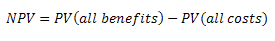
Here is an example. The initial investment is $100. The cash inflows in the next five
years are $50, $60, $70, $100, and $20, starting from year one. If the discount rate is
11.2%, what is the project's NPV value? Since only six cash flows are involved, we
could do the calculation manually:

In [3]:
r=0.112
print(-100+50/(1+r)+60/(1+r)**2+70/(1+r)**3+100/(1+r)**4+20/(1+r)**5)

121.55722687966407


In [4]:
import scipy as sp
cashflows=[-100,50,60,70,100,20]
sp.npv(0.112,cashflows)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  This is separate from the ipykernel package so we can avoid doing imports until


121.55722687966407

Based on the preceding result, the NPV of this project is $121.56. A normal project is
defined as follows: cash outflows first, then cash inflows. Anything else is an abnormal
project. For a normal project, its NPV is negatively correlated with the discount rate;
see the following graph. The reason is that when the discount rate increases, the
present value of the future cash flows (most of times benefits) will decrease more
than the current or the earliest cash flows (most of times costs). The NPV profile
describes the relationship between NPV and discount rate as shown in the following
graph. See Appendix E for the Python program to generate the graph. The y-axis is
NPV while the x-axis is the discount rate:
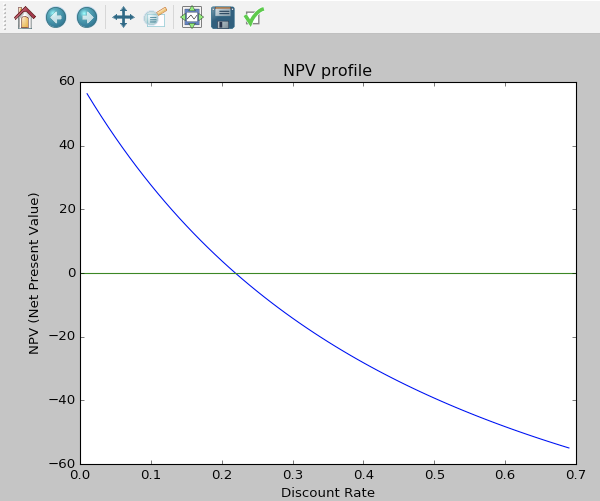

The scipy.npv() function estimates the present values for a given set of cash flows.
The first input variable is the discount rate, while the second input is an array of
cash flows. Note that the first cash flow in this cash flow array happens at time zero.
This scipy.npv() function is different from the Excel's NPV function, which is not a
true NPV function. Actually, the Excel NPV is a PV function. It estimates the present
value of future cash flows by assuming the first cash flow happens at the end of the
first period. An example of using an Excel npv() function is as follows:
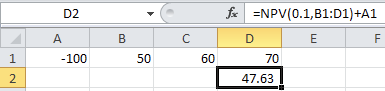


In [8]:
import numpy as np
c=[100]
np.npv(0.1,c)

100.0

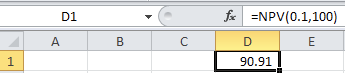

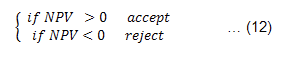

### Definition of IRR and IRR rule
The Internal Rate of Return (IRR) is defined as the discount rate that makes NPV
equal zero. Assume that we invest $100 today and the future cash flows will be $30,
$40, $40, and $50 for the next four years. Assuming that all cash flows happen at the
end of the year, what is the IRR for this investment? In the following program, the
scipy.irr() function is applied:

In [9]:
import scipy as sp
cashflows=[-100,30,40,40,50]
sp.irr(cashflows)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.irr is deprecated and will be removed in SciPy 2.0.0, use numpy.irr instead
  This is separate from the ipykernel package so we can avoid doing imports until


0.2001879105140867

For a normal project, the IRR rule is given here:
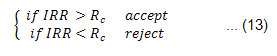

Here, Rc is the cost of capital. This IRR rule holds only for a normal project. Let's
look at the following investment opportunity. The initial investment is $100 today
and $50 next year. The cash inflows for the next five years will be $50, $70, $100, $90,
and $20. If the cost of capital is 10%, should we take the project? The time line and
corresponding cash flows are shown here:

In [11]:
import scipy as sp
cashflows=[-100,-50,50,70,100,90,20]
sp.irr(cashflows)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.irr is deprecated and will be removed in SciPy 2.0.0, use numpy.irr instead
  This is separate from the ipykernel package so we can avoid doing imports until


0.25949919326073245

Since the IRR is 25.9%, which is higher than the cost of capital of 10%, we should
accept the project based on the IRR rule. In the preceding example, it is a normal
project. For abnormal projects or projects with multiple IRRs, we could not apply
the IRR rule. When the cash flows change direction more than once, we might have
multiple IRRs. Assume that our cash flows will be 504, -432,-432, -432, and 843,
starting today:

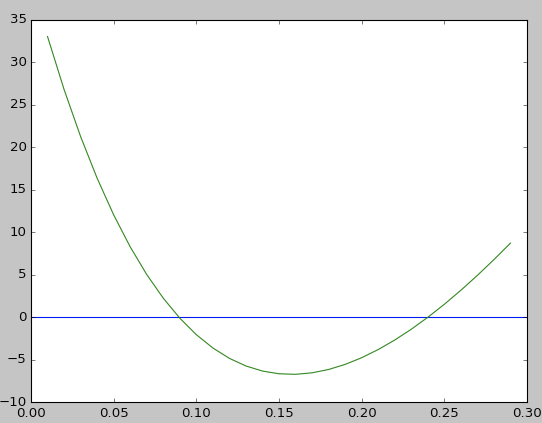

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.npv is deprecated and will be removed in SciPy 2.0.0, use numpy.npv instead
  # Remove the CWD from sys.path while we load stuff.


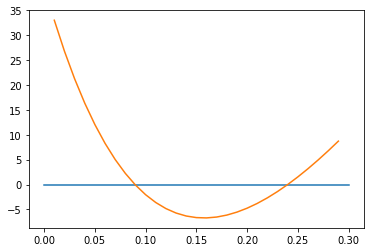

In [17]:
import scipy as sp
import matplotlib.pyplot as plt
cashflows=[504,-432,-432,-432,832]
rate=[]
npv=[]
x=[0,0.3]
y=[0,0]
for i in range(1,30):
    rate.append(0.01*i)
    npv.append(sp.npv(0.01*i,cashflows))
plt.plot(x,y),plt.plot(rate,npv)
plt.show()

In [22]:
import pandas_datareader.data as getData
x = getData.DataReader('IBM', data_source='yahoo',start='2004/1/30')


In [23]:
print(x)


                  High         Low        Open       Close     Volume  \
Date                                                                    
2004-01-30   99.330002   97.839996   98.019997   99.230003  6137600.0   
2004-02-02   99.940002   98.500000   99.150002   99.389999  6200000.0   
2004-02-03  100.000000   98.949997   99.000000  100.000000  5604300.0   
2004-02-04  100.430000   99.300003   99.379997  100.190002  8387500.0   
2004-02-05  100.089996   98.260002  100.000000   98.860001  5975000.0   
...                ...         ...         ...         ...        ...   
2020-06-29  119.779999  117.370003  117.980003  119.750000  4159500.0   
2020-06-30  121.199997  119.000000  119.190002  120.769997  3919500.0   
2020-07-01  121.230003  118.370003  120.269997  118.540001  4655800.0   
2020-07-02  121.419998  119.260002  119.690002  119.699997  3747000.0   
2020-07-06  121.849998  119.459999  121.250000  120.190002  4031281.0   

             Adj Close  
Date                    
